# Random Forests - Classification - Bank Note Authentication

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_banknote_authentication.csv')

In [3]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


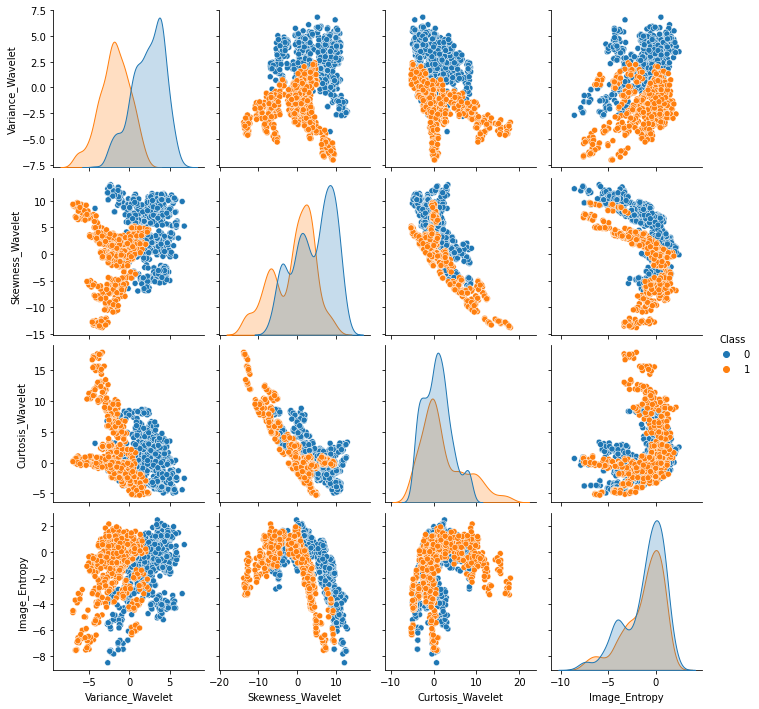

In [4]:
sns.pairplot(df, hue='Class')

**Create X and y**

In [5]:
X = df.drop('Class', axis=1)

In [6]:
y = df['Class']

**Train | Test Split**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

**Grid Search**

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = {
    'n_estimators': [64, 100, 128, 200],
    'max_features': [2, 3, 4],
    'bootstrap': [True, False],
    'oob_score': [True, False]
}

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier()

In [13]:
grid_model = GridSearchCV(rfc, param_grid)

In [14]:
grid_model.fit(X_train, y_train)

/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabbi/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  F

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [15]:
grid_model.best_estimator_

RandomForestClassifier(max_features=2, n_estimators=128, oob_score=True)

**Final Model**

In [16]:
rfc = RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [18]:
rfc.oob_score_

0.9939965694682675

**Performance Evaluation**

In [19]:
predictions = rfc.predict(X_test)

In [20]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



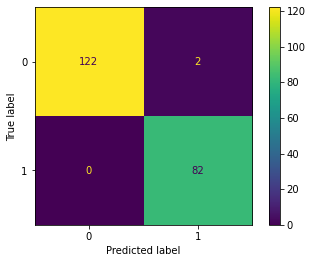

In [22]:
plot_confusion_matrix(rfc, X_test, y_test)

Since we have a small dataset, 200 estimators can be overkill. So, to analise that we can plot the errors against the number of estimators and the misclassifications against the number of estimators

In [23]:
errors = []
misclassifications = []

for n in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=n, max_features=2)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    error = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(error)
    misclassifications.append(n_missed)

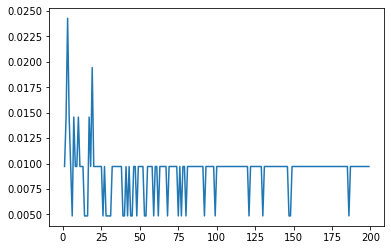

In [24]:
plt.plot(range(1,200), errors)

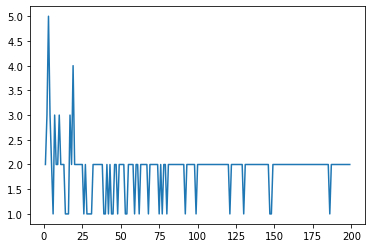

In [25]:
plt.plot(range(1,200), misclassifications)